<a href="https://colab.research.google.com/github/Erikagola/Data-Science-Job-Market-Analysis/blob/master/TEAM_1_PROJECT_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUSINESSS UNDERSTANDING




# DATA UNDERSTANDING

# DATA PREPARATION

## 3.1 Importing Library

In [ ]:
# Importing pandas library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3.2 Loading Datasets

In [ ]:
county_population = pd.read_csv('census2019populationcounty.csv')
county_population.head(5)

,COUNTY_PCODE,COUNTY_NAME,2019_POPULATION,MALE,FEMALE,TOTAL_HOUSEHOLDS,Density \n(Persons Per Sq. Km),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,KE01,Mombasa,"1,208,333","610,257","598,046","378,422","5,495",NaN,NaN,NaN,NaN,NaN,NaN
1,KE02,Kwale,"866,820","425,121","441,681","173,176",105,NaN,NaN,NaN,NaN,NaN,NaN
2,KE03,Kilifi,"1,453,787","704,089","749,673","298,472",116,NaN,NaN,NaN,NaN,NaN,NaN
3,KE04,Tana River,"315,943","158,550","157,391","68,242",8,NaN,NaN,NaN,NaN,NaN,NaN
4,KE05,Lamu,"143,920","76,103","67,813","37,963",23,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
health_facilities = pd.read_excel('KEN Health_Facilities.csv')
health_facilities.head(5)

,Facility Number,Facility Name,HMIS,Province,District,Division,LOCATION,County,Constituency,Sub-Location,Spatial Reference Method,Facility Type,Agency,Geolocation,Facility Type NAME
0,29,KIAMBU DISTRICT HOSPITAL,251,CENTRAL,KIAMBU,KIAMBAA,KIAMBAA S/AREA,KIAMBU,GATUNDU NORTH,TOWNSHIP(KIAMBAA),GPS,1,MOH,"(-1.16938000000, 36.82993000000)","Hospital Moh and Mission Districts, sub-districts"
1,36,KIJABE HOSPITAL,252,CENTRAL,KIAMBU,LARI,KIJABE,KIAMBU,GATUNDU NORTH,KIJABE,GPS,1,MISS,"(-0.94349000000, 36.59431000000)","Hospital Moh and Mission Districts, sub-districts"
2,51,NAZARETH HOSPITAL,255,CENTRAL,KIAMBU,LIMURU,KARAMBAINI,KIAMBU,GATUNDU NORTH,KARAMBAINI,1:50000 MAPS,1,MISS,"(-1.13378000000, 36.72570000000)","Hospital Moh and Mission Districts, sub-districts"
3,62,P.C.E.A. KIKUYU HOSPITAL,2441,CENTRAL,KIAMBU,KIKUYU,KIKUYU,KIAMBU,GATUNDU NORTH,KIKUYU TOWNSHIP,DDP,1,MISS,"(-1.26667000000, 36.66670000000)","Hospital Moh and Mission Districts, sub-districts"
4,66,TIGONI SUB-DISTRICT HOSPITAL,257,CENTRAL,KIAMBU,LIMURU,TIGONI,KIAMBU,GATUNDU NORTH,ITHANJI(KIAMBU),DDP,1,MOH,"(-1.12859000000, 36.64930000000)","Hospital Moh and Mission Districts, sub-districts"


In [ ]:
ICU_beds = pd.read_csv('KHF Data.csv')
ICU_beds.head(5)

,Cluster,County,Facility Name,Regular Isolation Beds Available,Regular Isolation Beds Recommended,Available ICU/Critical Care bed for Isolation,Recommended ICU/Critical beds for Isolation,Ventilators Available for Isoation,Ventilators Recommended for Isolation,ICU beds for General Patients(Public & Private)
0,North Rift,Elgeyo Marakwet,Iten Couty Referral Hospital,20.0,20.0,0.0,2.0,NaN,2.0,6.0
1,NaN,Nandi,Nandi Hills County Hospital,35.0,20.0,0.0,2.0,0.0,1.0,2.0
2,NaN,Tranzoia,Mt.Elgon Hospital,40.0,20.0,0.0,2.0,NaN,2.0,0.0
3,NaN,Turkana,Lodwar County Referral Hospital,12.0,20.0,0.0,2.0,NaN,2.0,3.0
4,NaN,Turkana,Lopiding Sub-County Hospital,0.0,20.0,0.0,2.0,NaN,2.0,NaN


In [ ]:
county_cases = pd.read_csv('Cases_per_county.csv')
county_cases.head(5)

,S/N o,County,Population (2019Census KNBS),Cumulative Cases,"Cases per 100,000 population"
0,1.0,Nairobi City,"4,397,073",8618.0,196.0
1,2.0,Mombasa,"1,208,333",1870.0,154.8
2,3.0,Busia,"893,681",662.0,74.1
3,4.0,Kajiado,"1,117,840",774.0,69.2
4,5.0,Kiambu,"2,417,735",907.0,37.5


## 3.3 Renaming Columns

In [ ]:
#renaming columns
county_population.rename(columns = {'COUNTY_PCODE': 'County_PCODE', 'COUNTY_NAME': 'County', '2019_POPULATION': '2019_Population', 'MALE': 'Male', 'FEMALE': 'Female', 'TOTAL_HOUSEHOLDS': 'Total_Households', 'Density \n(Persons Per Sq. Km)' : 'Density'}, inplace = True)
#view 
print(county_population.columns)
county_population.head(5)

Index(['County_PCODE', 'County', '2019_Population', 'Male', 'Female',
       'Total_Households', 'Density', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


,County_PCODE,County,2019_Population,Male,Female,Total_Households,Density,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,KE01,Mombasa,"1,208,333","610,257","598,046","378,422","5,495",NaN,NaN,NaN,NaN,NaN,NaN
1,KE02,Kwale,"866,820","425,121","441,681","173,176",105,NaN,NaN,NaN,NaN,NaN,NaN
2,KE03,Kilifi,"1,453,787","704,089","749,673","298,472",116,NaN,NaN,NaN,NaN,NaN,NaN
3,KE04,Tana River,"315,943","158,550","157,391","68,242",8,NaN,NaN,NaN,NaN,NaN,NaN
4,KE05,Lamu,"143,920","76,103","67,813","37,963",23,NaN,NaN,NaN,NaN,NaN,NaN


## 3.4 Dropping Columns and Rows

In [ ]:
# Dropping columns 'County_PCODE', 'Total_households' , 'Density (Persons Per Sq. Km'un
to_drop = county_population.columns.to_list()[7:]
to_drop.append('County_PCODE')
to_drop.append('Total_Households')
county_population.drop(to_drop, axis = 1, inplace= True)
county_population.head(5)

,County,2019_Population,Male,Female,Density
0,Mombasa,"1,208,333","610,257","598,046","5,495"
1,Kwale,"866,820","425,121","441,681",105
2,Kilifi,"1,453,787","704,089","749,673",116
3,Tana River,"315,943","158,550","157,391",8
4,Lamu,"143,920","76,103","67,813",23


In [ ]:
county_population.duplicated().sum()

13

In [ ]:
county_population.dropna(inplace=True)

In [ ]:
# Dropping columns 
health_facilities.drop(['Facility Number', 'HMIS',	'Province',	'District',	'Division',	'LOCATION', 'Constituency',	'Sub-Location',	'Spatial Reference Method',	'Facility Type',	'Agency',	'Geolocation',	'Facility Type NAME'], axis = 1, inplace = True)
health_facilities.head(5)

,Facility Name,County
0,KIAMBU DISTRICT HOSPITAL,KIAMBU
1,KIJABE HOSPITAL,KIAMBU
2,NAZARETH HOSPITAL,KIAMBU
3,P.C.E.A. KIKUYU HOSPITAL,KIAMBU
4,TIGONI SUB-DISTRICT HOSPITAL,KIAMBU


In [ ]:
health_facilities.isnull().sum()

Facility Name       2
County           1907
dtype: int64

In [ ]:
health_facilities.dropna(inplace=True)

In [ ]:
health_facilities.duplicated().sum()

27

In [ ]:
health_facilities.drop_duplicates(inplace=True)

In [ ]:
# Drop Column: 'Cluster'
ICU_beds.drop('Cluster', axis = 1, inplace = True)
ICU_beds.head()

,County,Facility Name,Regular Isolation Beds Available,Regular Isolation Beds Recommended,Available ICU/Critical Care bed for Isolation,Recommended ICU/Critical beds for Isolation,Ventilators Available for Isoation,Ventilators Recommended for Isolation,ICU beds for General Patients(Public & Private)
0,Elgeyo Marakwet,Iten Couty Referral Hospital,20.0,20.0,0.0,2.0,NaN,2.0,6.0
1,Nandi,Nandi Hills County Hospital,35.0,20.0,0.0,2.0,0.0,1.0,2.0
2,Tranzoia,Mt.Elgon Hospital,40.0,20.0,0.0,2.0,NaN,2.0,0.0
3,Turkana,Lodwar County Referral Hospital,12.0,20.0,0.0,2.0,NaN,2.0,3.0
4,Turkana,Lopiding Sub-County Hospital,0.0,20.0,0.0,2.0,NaN,2.0,NaN


In [ ]:

#Drop rows with the following in the county column
ICU_beds = ICU_beds[~ICU_beds.County.isin(['Regional Subtotal','Regional Sub Total','Regional Sub-total'])]


In [ ]:
ICU_beds.duplicated().any()

False

In [ ]:
ICU_beds.dropna(subset=['County'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ICU_beds.isnull().sum()

County                                              0
Facility Name                                       1
Regular Isolation Beds Available                    1
Regular Isolation Beds Recommended                  1
Available ICU/Critical Care bed for Isolation       1
Recommended ICU/Critical beds for Isolation         1
Ventilators Available for Isoation                 75
Ventilators Recommended for Isolation              15
ICU beds for General Patients(Public & Private)    57
dtype: int64

In [ ]:
# Drop column: 'S/N o'
county_cases.drop('S/N o', axis = 1, inplace = True)
county_cases.head(5)

,County,Population (2019Census KNBS),Cumulative Cases,"Cases per 100,000 population"
0,Nairobi City,"4,397,073",8618.0,196.0
1,Mombasa,"1,208,333",1870.0,154.8
2,Busia,"893,681",662.0,74.1
3,Kajiado,"1,117,840",774.0,69.2
4,Kiambu,"2,417,735",907.0,37.5


In [ ]:
county_cases.duplicated().sum()

0

In [ ]:
county_cases.isnull().sum()

County                          0
Population (2019Census KNBS)    0
Cumulative Cases                0
Cases per 100,000 population    0
dtype: int64

In [ ]:
county_cases.dropna(subset=['County'], inplace=True)

In [ ]:
county_cases.shape

(44, 4)

## 3.5 Merge the four Datasets to one main Dataframe

In [ ]:
matched_counties = set(county_population.County.to_list()).intersection(set(county_cases.County.to_list()))
len(matched_counties)

41

In [ ]:
set(county_population.County.to_list()).difference(set(county_cases.County.to_list()))

{'Baringo',
 'Elgeyo-Marakwet',
 'Nairobi',
 'Samburu',
 'Taita Taveta',
 'West Pokot'}

In [ ]:
set(county_cases.County.to_list()).difference(set(county_population.County.to_list()))

set()

In [ ]:
county_cases['County'].replace({'Elgeyo/Marakwet':'Elgeyo-Marakwet','Nairobi City':'Nairobi','Taita/Taveta':'Taita Taveta'},inplace=True)

In [ ]:
pop_cases = pd.merge(county_cases, county_population, on='County')

In [ ]:
pop_cases.drop(['Population (2019Census KNBS)'], axis=1, inplace=True)
pop_cases.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density
0,Nairobi,8618.0,196.0,"4,397,073","2,192,452","2,204,376","6,247"
1,Mombasa,1870.0,154.8,"1,208,333","610,257","598,046","5,495"
2,Busia,662.0,74.1,"893,681","426,252","467,401",526
3,Kajiado,774.0,69.2,"1,117,840","557,098","560,704",51
4,Kiambu,907.0,37.5,"2,417,735","1,187,146","1,230,454",952


In [ ]:
hospital_count = pd.DataFrame({'County Name': health_facilities.groupby(['County'])['Facility Name'].count().index, 'hospital_count':health_facilities.groupby(['County'])['Facility Name'].count()})
hospital_count.reset_index(inplace=True)
hospital_count.drop(['County Name'], axis=1,inplace=True)
hospital_count.head()

,County,hospital_count
0,BARINGO,115
1,BOMET,77
2,BUNGOMA,88
3,BUSIA,81
4,ELEGEYO-MARAKWET,78


In [ ]:
pop_cases['County'] = pop_cases['County'].str.upper()

In [ ]:
set(hospital_count.County.to_list()).difference(set(pop_cases.County.to_list()))

{'BARINGO', 'ELEGEYO-MARAKWET', 'SAMBURU', 'THARAKA - NITHI', 'WEST POKOT'}

In [ ]:
set(pop_cases.County.to_list()).difference(set(hospital_count.County.to_list()))

{'ELGEYO-MARAKWET', 'THARAKA-NITHI'}

In [ ]:
hospital_count['County'].replace({'ELEGEYO-MARAKWET':'ELGEYO-MARAKWET', 'THARAKA - NITHI': 'THARAKA-NITHI'}, inplace=True)

In [ ]:
set(pop_cases.County.to_list()).difference(set(hospital_count.County.to_list()))

set()

In [ ]:
hospital_cases = pd.merge(pop_cases, hospital_count, on='County')

In [ ]:
hospital_cases.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count
0,NAIROBI,8618.0,196.0,"4,397,073","2,192,452","2,204,376","6,247",170
1,MOMBASA,1870.0,154.8,"1,208,333","610,257","598,046","5,495",129
2,BUSIA,662.0,74.1,"893,681","426,252","467,401",526,81
3,KAJIADO,774.0,69.2,"1,117,840","557,098","560,704",51,114
4,KIAMBU,907.0,37.5,"2,417,735","1,187,146","1,230,454",952,165


In [ ]:
rec_beds = pd.DataFrame({'Isolation_beds':ICU_beds.groupby(['County'])['Regular Isolation Beds Available'].sum(), 'Recommended_beds':ICU_beds.groupby(['County'])['Regular Isolation Beds Recommended'].sum()})
rec_beds.reset_index(inplace=True)

In [ ]:
rec_beds.County = rec_beds.County.str.upper()

In [ ]:
set(hospital_cases.County.to_list()).difference(set(rec_beds.County.to_list()))

{'ELGEYO-MARAKWET',
 'KWALE',
 "MURANG'A",
 'THARAKA-NITHI',
 'TRANS NZOIA',
 'UASIN GISHU'}

In [ ]:
set(rec_beds.County.to_list()).difference(set(hospital_cases.County.to_list()))

{'BARINGO',
 'ELGEYO MARAKWET',
 'MURANGA',
 'SAMBURU',
 'THARAKA NITHI',
 'TRANZOIA',
 'UASIN GICHU',
 'WEST POKOT'}

In [ ]:
rec_beds['County'].replace({'ELGEYO MARAKWET':'ELGEYO-MARAKWET','THARAKA NITHI': 'THARAKA-NITHI','TRANZOIA':'TRANS NZOIA','MURANGA':"MURANG'A", 'UASIN GICHU':'UASIN GISHU'}, inplace=True)

In [ ]:
final_df = pd.merge(hospital_cases, rec_beds, on='County')

# DATA ANALYSIS

In [ ]:
final_df.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds
0,NAIROBI,8618.0,196.0,"4,397,073","2,192,452","2,204,376","6,247",170,582.0,716.0
1,MOMBASA,1870.0,154.8,"1,208,333","610,257","598,046","5,495",129,25.0,90.0
2,BUSIA,662.0,74.1,"893,681","426,252","467,401",526,81,100.0,20.0
3,KAJIADO,774.0,69.2,"1,117,840","557,098","560,704",51,114,28.0,40.0
4,KIAMBU,907.0,37.5,"2,417,735","1,187,146","1,230,454",952,165,34.0,120.0


In [ ]:
final_df.dtypes

County                           object
Cumulative Cases                float64
Cases per 100,000 population    float64
2019_Population                  object
Male                             object
Female                           object
Density                          object
hospital_count                    int64
Isolation_beds                  float64
Recommended_beds                float64
dtype: object

In [ ]:
# Get difference between recommended isolation beds and bed available
final_df['bed_preparedness'] = final_df.Recommended_beds - final_df.Isolation_beds

In [ ]:
# Create rank variable based on bed preparedness - a larger value signifies larger deficit in number of beds hence lower rank
final_df['bed_surplus_rank'] = final_df['bed_preparedness'].rank(ascending=True)

In [ ]:
final_df.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds,bed_preparedness,bed_surplus_rank
0,NAIROBI,8618.0,196.0,"4,397,073","2,192,452","2,204,376","6,247",170,582.0,716.0,134.0,43.0
1,MOMBASA,1870.0,154.8,"1,208,333","610,257","598,046","5,495",129,25.0,90.0,65.0,40.0
2,BUSIA,662.0,74.1,"893,681","426,252","467,401",526,81,100.0,20.0,-80.0,1.0
3,KAJIADO,774.0,69.2,"1,117,840","557,098","560,704",51,114,28.0,40.0,12.0,22.5
4,KIAMBU,907.0,37.5,"2,417,735","1,187,146","1,230,454",952,165,34.0,120.0,86.0,42.0


In [ ]:
# Change datatype to integer
final_df['2019_Population'] = final_df['2019_Population'].str.replace(",", "").astype(np.int64)

In [ ]:
# Calculate bed to population ratio
final_df['bed_pop_ratio'] = final_df.Isolation_beds / final_df['2019_Population']

In [ ]:
final_df.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds,bed_preparedness,bed_surplus_rank,bed_pop_ratio
0,NAIROBI,8618.0,196.0,4397073,"2,192,452","2,204,376","6,247",170,582.0,716.0,134.0,43.0,0.000132
1,MOMBASA,1870.0,154.8,1208333,"610,257","598,046","5,495",129,25.0,90.0,65.0,40.0,0.000021
2,BUSIA,662.0,74.1,893681,"426,252","467,401",526,81,100.0,20.0,-80.0,1.0,0.000112
3,KAJIADO,774.0,69.2,1117840,"557,098","560,704",51,114,28.0,40.0,12.0,22.5,0.000025
4,KIAMBU,907.0,37.5,2417735,"1,187,146","1,230,454",952,165,34.0,120.0,86.0,42.0,0.000014


In [ ]:
# Change datatype to integer
final_df['Density'] = final_df.Density.str.replace(",","").astype(np.int64)

In [ ]:
# Rank counties based on hospital count, a higher hospital count signifies better capacity handling hence higher rank
final_df['hospital_count_rank'] = final_df['hospital_count'].rank(ascending=False)

In [ ]:
# Rank counties based on cumulative cases, a higher number signifies a higher probability of infections hence lower rank in preparedness
final_df['cases_rank'] = final_df['Cumulative Cases'].rank(ascending=True)

In [ ]:
# Rank counties based on ranking [number of people per sq km], a higher number signifies a higher probability of infections hence lower rank in preparedness
final_df['density_rank'] = final_df['Density'].rank(ascending=True)

In [ ]:
# Rank counties based on bed to population ratio, a higher ratio means fewer people are assigned to one bed hence better preparedness hence higher rank
final_df['bed_pop_ratio_rank'] = (final_df['bed_pop_ratio'] * 100000).rank(ascending=False)

In [ ]:
final_df.head()

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds,bed_preparedness,bed_surplus_rank,bed_pop_ratio,hospital_count_rank,cases_rank,density_rank,bed_pop_ratio_rank
0,NAIROBI,8618.0,196.0,4397073,"2,192,452","2,204,376",6247,170,582.0,716.0,134.0,43.0,0.000132,7.0,43.0,43.0,1.0
1,MOMBASA,1870.0,154.8,1208333,"610,257","598,046",5495,129,25.0,90.0,65.0,40.0,0.000021,12.0,42.0,42.0,27.0
2,BUSIA,662.0,74.1,893681,"426,252","467,401",526,81,100.0,20.0,-80.0,1.0,0.000112,25.5,39.0,34.0,4.0
3,KAJIADO,774.0,69.2,1117840,"557,098","560,704",51,114,28.0,40.0,12.0,22.5,0.000025,17.0,40.0,11.0,24.0
4,KIAMBU,907.0,37.5,2417735,"1,187,146","1,230,454",952,165,34.0,120.0,86.0,42.0,0.000014,9.0,41.0,39.0,33.0


In [ ]:
# Compute aggregate ranking of counties
rank_df = final_df[['bed_pop_ratio_rank','bed_surplus_rank','hospital_count_rank','cases_rank','density_rank']]
rank_df['agg'] = rank_df.mean(axis=1)
rank_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bed_pop_ratio_rank,bed_surplus_rank,hospital_count_rank,cases_rank,density_rank,agg
0,1.0,43.0,7.0,43.0,43.0,27.4
1,27.0,40.0,12.0,42.0,42.0,32.6
2,4.0,1.0,25.5,39.0,34.0,20.7
3,24.0,22.5,17.0,40.0,11.0,22.9
4,33.0,42.0,9.0,41.0,39.0,32.8


In [ ]:
final_df['aggregate_rank'] = rank_df['agg']

In [ ]:
county_ranking = final_df[['County','aggregate_rank']]

In [ ]:
county_ranking = county_ranking.sort_values(by='aggregate_rank', ascending=True)

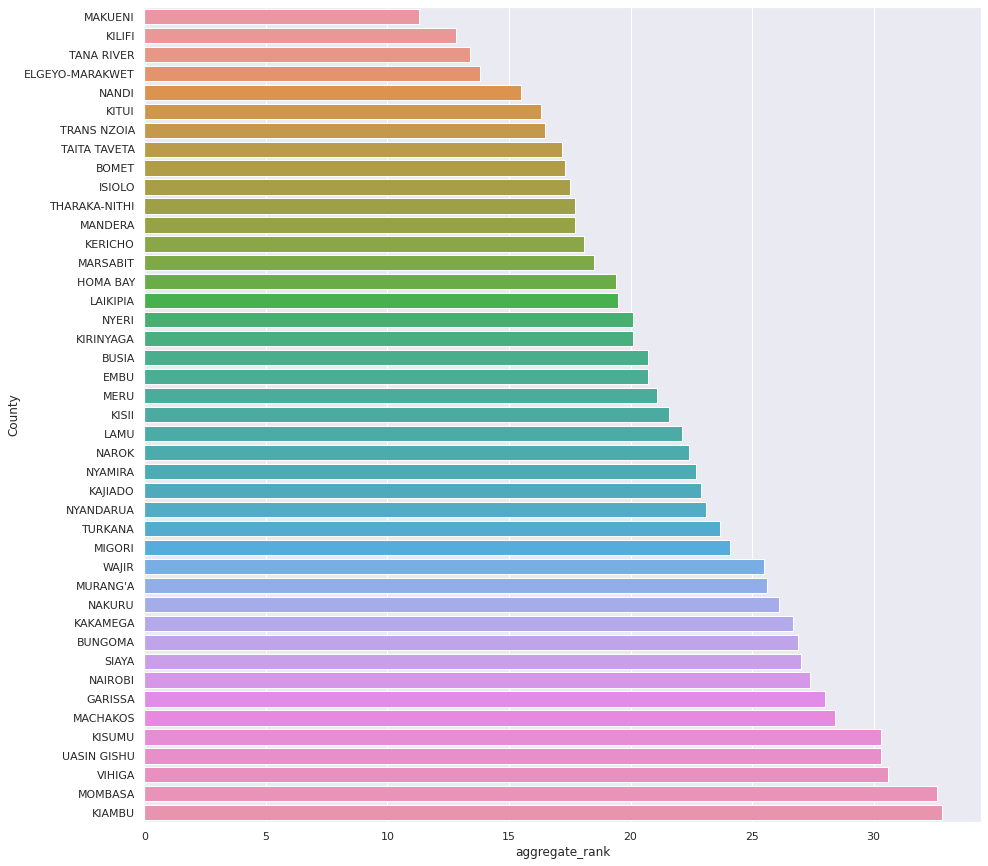

In [ ]:
# Order counties by aggregate ranking
plt.figure(figsize=(15,15))
sns.barplot(x = county_ranking['aggregate_rank'], y = county_ranking['County'], palette=None)

In [ ]:
# Get top 5 prepared counties
best_prepared_counties = county_ranking['County'].head(5).reset_index()
best_prepared_counties.drop(['index'], axis=1, inplace=True)
best_prepared_counties

,County
0,MAKUENI
1,KILIFI
2,TANA RIVER
3,ELGEYO-MARAKWET
4,NANDI


In [ ]:
# Get top 5 worst prepared counties
worst_prepared_counties = county_ranking['County'].tail().reset_index().sort_index(ascending=False)
worst_prepared_counties.drop(['index'], axis=1,inplace=True)
worst_prepared_counties

,County
4,KIAMBU
3,MOMBASA
2,VIHIGA
1,UASIN GISHU
0,KISUMU


In [ ]:
# Among worst prepared counties, which county has the lowest bed to population ratio?
ratio_df = final_df[final_df['County'].isin(worst_prepared_counties['County'].to_list())]
ratio_df = ratio_df[['bed_pop_ratio','bed_preparedness','County']]
ratio_df.rename(columns={'bed_preparedness':'bed_deficit'}, inplace= True)
ratio_df['bed_pop_ratio x (10^-5)'] = ratio_df['bed_pop_ratio'] * 100000
ratio_df.sort_values(by=['bed_pop_ratio','bed_deficit'])

,bed_pop_ratio,bed_deficit,County,bed_pop_ratio x (10^-5)
28,0.000010,34.0,VIHIGA,1.016927
4,0.000014,86.0,KIAMBU,1.406275
18,0.000017,50.0,KISUMU,1.730742
1,0.000021,65.0,MOMBASA,2.068966
8,0.000032,83.0,UASIN GISHU,3.180919


Vihiga has the lowest bed to population ratio with a deficit of 34 beds

In [ ]:
# Which county has the lowest bed to population ratio overall?
final_df['']

,County,Cumulative Cases,"Cases per 100,000 population",2019_Population,Male,Female,Density,hospital_count,Isolation_beds,Recommended_beds,bed_preparedness,bed_surplus_rank,bed_pop_ratio,hospital_count_rank,cases_rank,density_rank,bed_pop_ratio_rank,aggregate_rank
1,MOMBASA,1870.0,154.8,1208333,"610,257","598,046",5495,129,25.0,90.0,65.0,40.0,0.000021,12.0,42.0,42.0,27.0,32.6
4,KIAMBU,907.0,37.5,2417735,"1,187,146","1,230,454",952,165,34.0,120.0,86.0,42.0,0.000014,9.0,41.0,39.0,33.0,32.8
8,UASIN GISHU,180.0,15.5,1163186,"580,269","582,889",342,77,37.0,120.0,83.0,41.0,0.000032,30.5,35.0,25.0,20.0,30.3
18,KISUMU,43.0,3.7,1155574,"560,942","594,609",554,107,20.0,70.0,50.0,37.0,0.000017,20.0,29.5,36.0,29.0,30.3
28,VIHIGA,10.0,1.7,590013,"283,678","306,323",1047,78,6.0,40.0,34.0,33.5,0.000010,28.5,13.0,41.0,37.0,30.6


# RECOMMENDATION

1) The least five prepared counties in terms of isolating beds to COVID 19 patients are:Kiambu,Kajiando,Busia,Mombasa and Nairobi they should consider allocating more beds capacity in preparation to the rise of COVID 19 cases.
2) The most prepared counties in relation to COVID 19 are:Makueni,Kilifi,Tana River,Elgeyo Marakwet and Nandi in that order.We arrived at this by looking at bed to population ratio.
3) The least five prepared counties to tackle the COVID 19 epidamic are Kiambu,Kilifi,Tana River,Elgeyo Marakwet and Nandi from our analysis above.They should consider improving their preparedness by increasing COVID 19 isolations beds in line to their respectiful populations.
N/B The data were used is dynamic as counties are putting more isolation beds to COVID 19 patients and the number of confirmed cases are rising drastically across the country.